MachineLeaningCourse vol.11
# 決定木・ランダムフォレスト

### 決定木
決定木は教師あり分類アルゴリズムの一つです。木構造を利用した分類アルゴリズムです。

大きな特徴として、__意味解釈性__が高いということがあげられます。意味解釈性とは、得られた結果の意味を解釈しやすいかどうか？を表すものです。

では、決定木がどういうものなのか、図でイメージしやすいように勉強していきましょう。

![](https://s3.amazonaws.com/ai-standard/pic11-1.png)

決定木アルゴリズムを使用して、決定木のルートから初めて、情報利得（Information Gain：分割された集合の要素にたいしてのばらつきの減少）が最大となる特徴量でデータを分割する。

リーフが純粋になる（分割されたデータのばらつきの減少がなくなる）まで、この分割を子ノードごとに繰り返すことができる。
リーフが純粋になるというのは、各リーフのサンプルがすべて同じクラスになることを意味している。

決定木の目的関数は、分割ごとに情報利得が最大となるように定式化して、以下の様に定義されます。

$$IG(D_p, f) = I(D_p) - \sum^{m}_{j=1}I(D_J)$$

ここで、$f$は分割を行う特徴量であり、$D_p$は親のデータセット、$D_j$は$j$番目の子ノードのデータセットです。
$I$は不純度を数値化したものであり、$N_p$は親ノードのサンプルの総数、$N_j$は$j$番目の子コードのサンプルの個数です。

このように、情報利得は、__「親ノードの不純度」と「子ノードの不純度」の差__です。

上記の式は、一般的にm個のノードを対象として情報利得を定式化しましたが、組み合わせ探索空間を減らすために、scikit-learnでは、二分決定木を実装しています。つまり、親ノードはそれぞれ２つの子ノード$D_{left}$と$D_{right}$に分かれます。

$$IG(D_p, f) = I(D_p) - \frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})$$

二分決定木でよく使われる不純度の指標として、__ジニ不純度__があげられる。

$$I(t) = \sum^{c}_{i=1}p(i \ |\  t)(1 - p(i \ |\  t))  = 1 - \sum^{c}_{i=1}p(i \ |\  t)^2$$

ここで、$p(i \ |\  t)$は、特定のノードｔにおいてクラスiに属するサンプルの割合を表します。cはクラス数です。今回は二値分類なのでc=2です。

以上が、決定木の目的関数となります。

In [5]:
# Iris データのインポート
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,[2,3]], iris.target, test_size=0.3, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std =  scaler.transform(X_test)

scikit-learnでのコードは以下のようになります。

【ドキュメント】
http://pythondatascience.plavox.info/scikit-learn/scikit-learn%E3%81%A7%E6%B1%BA%E5%AE%9A%E6%9C%A8%E5%88%86%E6%9E%90/

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [8]:
# ２次元データの決定曲線をプロットする関数
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

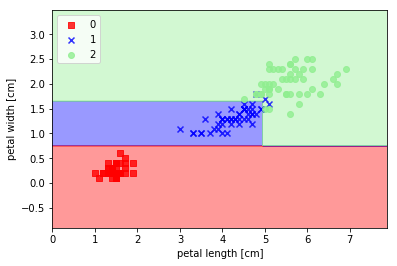

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

scikit-learnにはトレーニング後の決定木を.dotファイルとしてエクスポートできる機能があります。
このファイルは、GraphVizプログラムを使って可視化できます。

以下は、macのインストール方法です。

> $ brew install graphviz

In [15]:
from sklearn.tree import export_graphviz

# .dotファイルをエクスポート
export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'])

ターミナルで以下を実行
> dot -Tpng tree.dot -o tree.png

![](https://s3.amazonaws.com/ai-standard/pic11-2.png)

GraphVizで作成した決定木の図をみると、どのようにクラス判定を行っているかが正確に読み取ることができます。

このように、クラス判定のロジックを説明しやすいので、ビジネスの現場では、決定木がしばしば使われます。

ついでに、最適なパラメータも計算しておきましょう。

In [21]:
from sklearn.grid_search import GridSearchCV

# ハイパーパラメータの設定
param = {'min_samples_leaf': [i for i in range(1, 7)],
                 'max_depth':  [i for i in range(2, 8)]}
print(param)

tree_clf = GridSearchCV(DecisionTreeClassifier(random_state=0), param, cv=5, scoring='f1_micro')
tree_clf.fit(X_train_std, y_train)

{'max_depth': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1_micro', verbose=0)

In [22]:
def print_param_table(clf, X_test, y_test, score):
    from sklearn.metrics import classification_report
    print("#　スコアリング: {}\n".format(score))
    print("# ベストモデル:\n\n{}\n".format(clf.best_estimator_))
    print("# ベストパラメータ:\n\n{}\n".format(clf.best_params_))
    print("# トレーニングデータでCVした時の平均スコア:\n")
    for params, mean_score, scores in clf.grid_scores_:
        print("{:.3f} (+/- {:.5f}) for {}".format(mean_score, scores.std() * 2, params))
    print("\n# テストデータでの識別結果:\n")
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))

In [23]:
print_param_table(tree_clf, X_test_std, y_test, 'f1_micro')

#　スコアリング: f1_micro

# ベストモデル:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

# ベストパラメータ:

{'min_samples_leaf': 1, 'max_depth': 3}

# トレーニングデータでCVした時の平均スコア:

0.933 (+/- 0.13612) for {'min_samples_leaf': 1, 'max_depth': 2}
0.933 (+/- 0.13612) for {'min_samples_leaf': 2, 'max_depth': 2}
0.933 (+/- 0.13612) for {'min_samples_leaf': 3, 'max_depth': 2}
0.933 (+/- 0.13612) for {'min_samples_leaf': 4, 'max_depth': 2}
0.933 (+/- 0.13612) for {'min_samples_leaf': 5, 'max_depth': 2}
0.933 (+/- 0.13612) for {'min_samples_leaf': 6, 'max_depth': 2}
0.943 (+/- 0.13322) for {'min_samples_leaf': 1, 'max_depth': 3}
0.943 (+/- 0.13322) for {'min_samples_leaf': 2, 'max_depth': 3}
0.943 (+/- 0.13322) for {'min_samples_leaf': 3, 'max_depth': 3}
0.933 

### ランダムフォレスト
ランダムフォレストは決定木を複数組み合わせて、各決定木の予測結果を多数決することによって結果を得ます。

以下にアルゴリズムを示します。

1. トレーニングデータセットからn個のサンプルをランダムに抽出する
2. 決定木を成長させる
  - d個の特徴量をランダムに非復元抽出する。
  - 目的関数に従って、最適な分割になるような特徴量を使って、ノードを分割する。
3. 1,2ステップをk回繰り返す
4. 予測結果を多数決することによって分類閾値(ラベル)を決定する。

ランダムフォレストはパラメータが非常に簡単になるという利点があります。

主要なパラメータはサンプリング数（n）と決定木を成長させる際に使用する特徴量の数(d)だけです。決定木の特徴量数(d)は一般的にサンプル数をnとしたときに$d = \sqrt n$ にすると良いと言われています。

nを大きくすると、ランダム性が低下し、過学習に陥る可能性が高くなる。逆に、nを小さくすると、モデルの精度は低くなるが、過学習には陥りにくくなる。

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
# ハイパーパラメータの設定
param = {'n_estimators': [i for i in range(1, 11)]}
print(param)

rf_clf = GridSearchCV(RandomForestClassifier(criterion='gini', random_state=0, n_jobs=-1), param, cv=5, scoring='f1_micro')
rf_clf.fit(X_train_std, y_train)

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1_micro', verbose=0)

In [32]:
print_param_table(rf_clf, X_test_std, y_test, 'f1_micro')

#　スコアリング: f1_micro

# ベストモデル:

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=4, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

# ベストパラメータ:

{'n_estimators': 4}

# トレーニングデータでCVした時の平均スコア:

0.924 (+/- 0.11088) for {'n_estimators': 1}
0.924 (+/- 0.12270) for {'n_estimators': 2}
0.914 (+/- 0.13433) for {'n_estimators': 3}
0.933 (+/- 0.13612) for {'n_estimators': 4}
0.924 (+/- 0.14903) for {'n_estimators': 5}
0.933 (+/- 0.13612) for {'n_estimators': 6}
0.924 (+/- 0.14903) for {'n_estimators': 7}
0.924 (+/- 0.14903) for {'n_estimators': 8}
0.933 (+/- 0.13612) for {'n_estimators': 9}
0.933 (+/- 0.13612) for {'n_estimators': 10}

# テストデータでの識別結果:

             precision    recall  f1-score   support

          0    

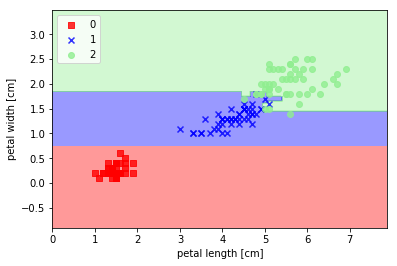

In [34]:
# 最適なパラメータでのプロット

forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=4, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier=forest)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

#### ランダムフォレストで特徴量の重要度を測定する
ランダムフォレストでは、すべての決定木から計算された不純度の平均的な減少量として特徴量の重要度を測定できます。

In [43]:
importances = forest.feature_importances_

print(importances)

[ 0.3070078  0.6929922]


In [ ]:
# ↑特徴量名がわからん笑